In [8]:
from pyspark import SparkConf, SparkContext
# 스파크 환경 설정 객체 생성
conf = SparkConf().setMaster("local").setAppName("241206_01_RDD")
spark = SparkContext(conf=conf).getOrCreate()

In [11]:
import os
directory = os.path.join(os.getcwd(),"data")
filename = "Book"
filepath = os.path.join(directory, filename)
lines = spark.textFile("file:///"+filepath.replace("\\","/"))
lines

file:////home/lab12/src/data/Book MapPartitionsRDD[3] at textFile at NativeMethodAccessorImpl.java:0

In [12]:
lines.take(3)

['Self-Employment: Building an Internet Business of One',
 'Achieving Financial and Personal Freedom through a Lifestyle Technology Business',
 'By Frank Kane']

In [13]:
map_words = lines.map(lambda x:x.split())
map_words.take(5)

[['Self-Employment:', 'Building', 'an', 'Internet', 'Business', 'of', 'One'],
 ['Achieving',
  'Financial',
  'and',
  'Personal',
  'Freedom',
  'through',
  'a',
  'Lifestyle',
  'Technology',
  'Business'],
 ['By', 'Frank', 'Kane'],
 [],
 []]

In [14]:
words = lines.flatMap(lambda x:x.split())
words.take(5)

['Self-Employment:', 'Building', 'an', 'Internet', 'Business']

In [15]:
wordsCounts = words.countByValue()
wordsCounts

defaultdict(int,
            {'Self-Employment:': 1,
             'Building': 5,
             'an': 172,
             'Internet': 13,
             'Business': 19,
             'of': 941,
             'One': 12,
             'Achieving': 1,
             'Financial': 3,
             'and': 901,
             'Personal': 3,
             'Freedom': 7,
             'through': 55,
             'a': 1148,
             'Lifestyle': 5,
             'Technology': 2,
             'By': 9,
             'Frank': 10,
             'Kane': 7,
             'Copyright': 1,
             '�': 174,
             '2015': 3,
             'Kane.': 1,
             'All': 13,
             'rights': 3,
             'reserved': 2,
             'worldwide.': 2,
             'CONTENTS': 1,
             'Disclaimer': 1,
             'Preface': 1,
             'Part': 2,
             'I:': 2,
             'Making': 5,
             'the': 1176,
             'Big': 1,
             'Decision': 1,
             'Overcoming'

In [23]:
wordsCounts.items()

dict_items([('Self-Employment:', 1), ('Building', 5), ('an', 172), ('Internet', 13), ('Business', 19), ('of', 941), ('One', 12), ('Achieving', 1), ('Financial', 3), ('and', 901), ('Personal', 3), ('Freedom', 7), ('through', 55), ('a', 1148), ('Lifestyle', 5), ('Technology', 2), ('By', 9), ('Frank', 10), ('Kane', 7), ('Copyright', 1), ('�', 174), ('2015', 3), ('Kane.', 1), ('All', 13), ('rights', 3), ('reserved', 2), ('worldwide.', 2), ('CONTENTS', 1), ('Disclaimer', 1), ('Preface', 1), ('Part', 2), ('I:', 2), ('Making', 5), ('the', 1176), ('Big', 1), ('Decision', 1), ('Overcoming', 1), ('Inertia', 1), ('Fear', 1), ('Failure', 1), ('Career', 1), ('Indoctrination', 2), ('The', 88), ('Carrot', 1), ('on', 399), ('Stick', 2), ('Ego', 1), ('Protection', 1), ('Your', 62), ('Employer', 2), ('as', 297), ('Security', 2), ('Blanket', 1), ('Why', 3), ('it�s', 28), ('Worth', 1), ('it', 311), ('Unlimited', 2), ('Growth', 4), ('Potential', 1), ('Investing', 3), ('in', 552), ('Yourself,', 1), ('Not', 

In [24]:
stop_words={'a','an'}

In [26]:
filtered_word_counts = { k:v for k,v in wordsCounts.items() if k.lower() not in stop_words}
filtered_word_counts

{'Self-Employment:': 1,
 'Building': 5,
 'Internet': 13,
 'Business': 19,
 'of': 941,
 'One': 12,
 'Achieving': 1,
 'Financial': 3,
 'and': 901,
 'Personal': 3,
 'Freedom': 7,
 'through': 55,
 'Lifestyle': 5,
 'Technology': 2,
 'By': 9,
 'Frank': 10,
 'Kane': 7,
 'Copyright': 1,
 '�': 174,
 '2015': 3,
 'Kane.': 1,
 'All': 13,
 'rights': 3,
 'reserved': 2,
 'worldwide.': 2,
 'CONTENTS': 1,
 'Disclaimer': 1,
 'Preface': 1,
 'Part': 2,
 'I:': 2,
 'Making': 5,
 'the': 1176,
 'Big': 1,
 'Decision': 1,
 'Overcoming': 1,
 'Inertia': 1,
 'Fear': 1,
 'Failure': 1,
 'Career': 1,
 'Indoctrination': 2,
 'The': 88,
 'Carrot': 1,
 'on': 399,
 'Stick': 2,
 'Ego': 1,
 'Protection': 1,
 'Your': 62,
 'Employer': 2,
 'as': 297,
 'Security': 2,
 'Blanket': 1,
 'Why': 3,
 'it�s': 28,
 'Worth': 1,
 'it': 311,
 'Unlimited': 2,
 'Growth': 4,
 'Potential': 1,
 'Investing': 3,
 'in': 552,
 'Yourself,': 1,
 'Not': 7,
 'Someone': 2,
 'Else': 1,
 'No': 14,
 'Dependencies': 1,
 'Commute': 1,
 'to': 1789,
 'Live': 3

In [17]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 166.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 170.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.0 MB/s eta 0:00:00


In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [27]:
!pip install matplotlib


In [32]:
top_words = sorted(filtered_word_counts.items(), key=lambda x:x[1], reverse=True)[:20]
word_list = [word for word, count in top_words]
word_counts_list = [count for word, count in top_words]

<BarContainer object of 20 artists>

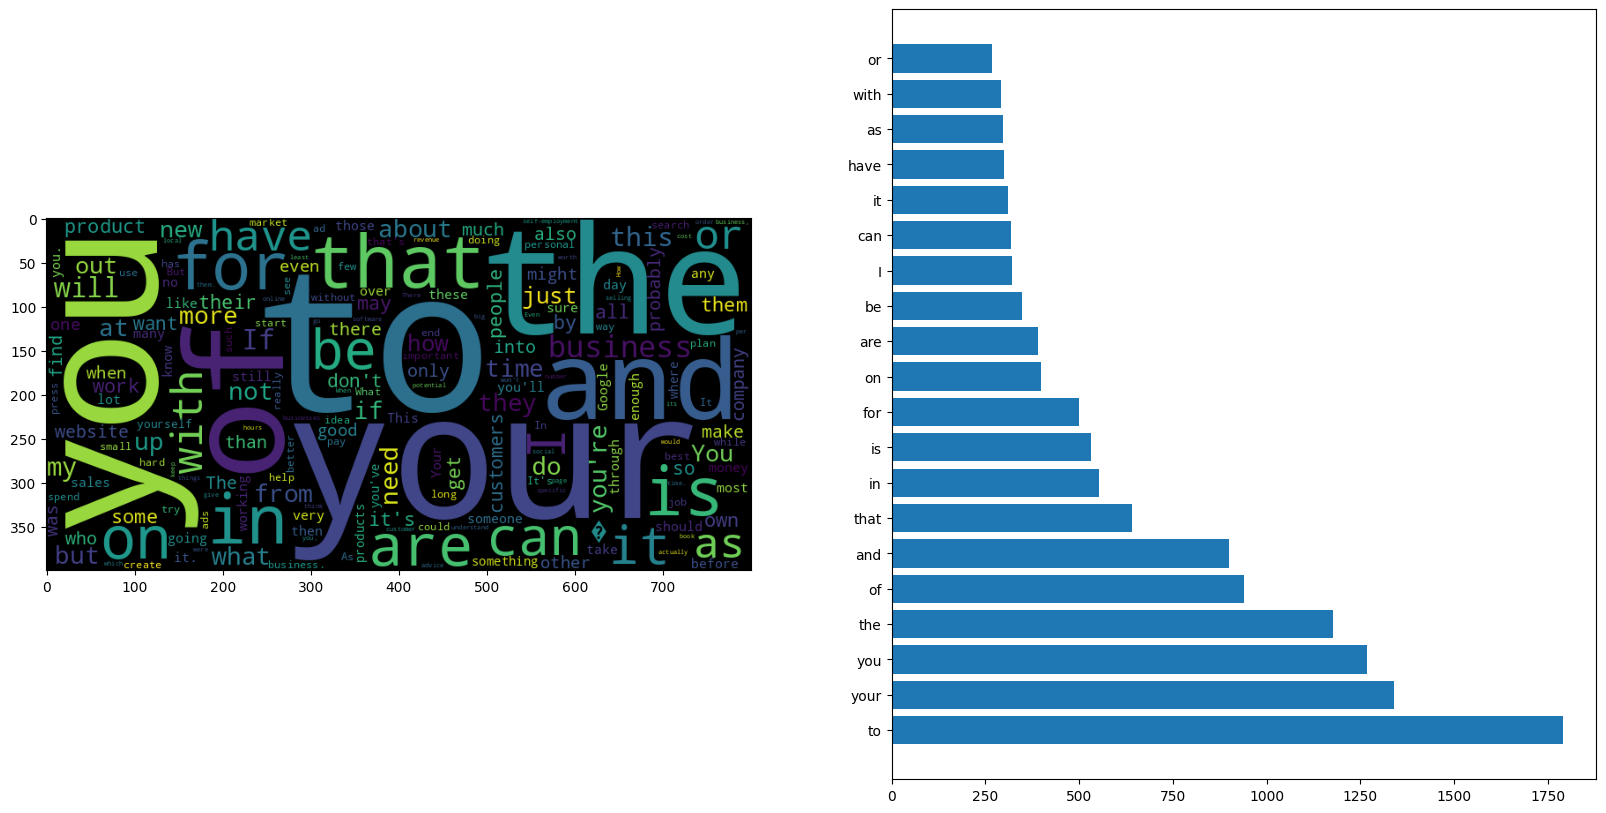

In [35]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
wc = WordCloud(width=800, height=400).generate_from_frequencies(filtered_word_counts)
plt.imshow(wc)

plt.subplot(1,2,2)
plt.barh(word_list, word_counts_list)

In [36]:
spark.stop()